In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Feature Engineering

In [3]:
df = df.drop(columns = ['deck', 'who', 'adult_male', 'embark_town', 'alive'])

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,False
1,1,1,female,38.0,1,0,71.2833,C,First,False
2,1,3,female,26.0,0,0,7.9250,S,Third,True
3,1,1,female,35.0,1,0,53.1000,S,First,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True


In [5]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [6]:
# Impute missing values
cat_si = SimpleImputer(strategy='most_frequent')
df[['embarked']] = cat_si.fit_transform(df[['embarked']])
age_si = SimpleImputer(strategy='median')
df[['age']] = age_si.fit_transform(df[['age']])

In [7]:
# Encode the categorical feature
label = LabelEncoder()
df['sex'] = label.fit_transform(df['sex'])
df['embarked'] = label.fit_transform(df['embarked'])
df['alone'] = label.fit_transform(df['alone'])
df['class'] = label.fit_transform(df['class'])

In [8]:
# train & split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='survived'),
                                                   df['survived'],
                                                   test_size = 0.2,
                                                   random_state = 42)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')
print(f'Classification Report : \n{classification_report(y_test, y_pred)}')
print(f'Confusion Matrix : \n{confusion_matrix(y_test, y_pred)}')

Accuracy Score : 0.776536312849162
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Confusion Matrix : 
[[83 22]
 [18 56]]


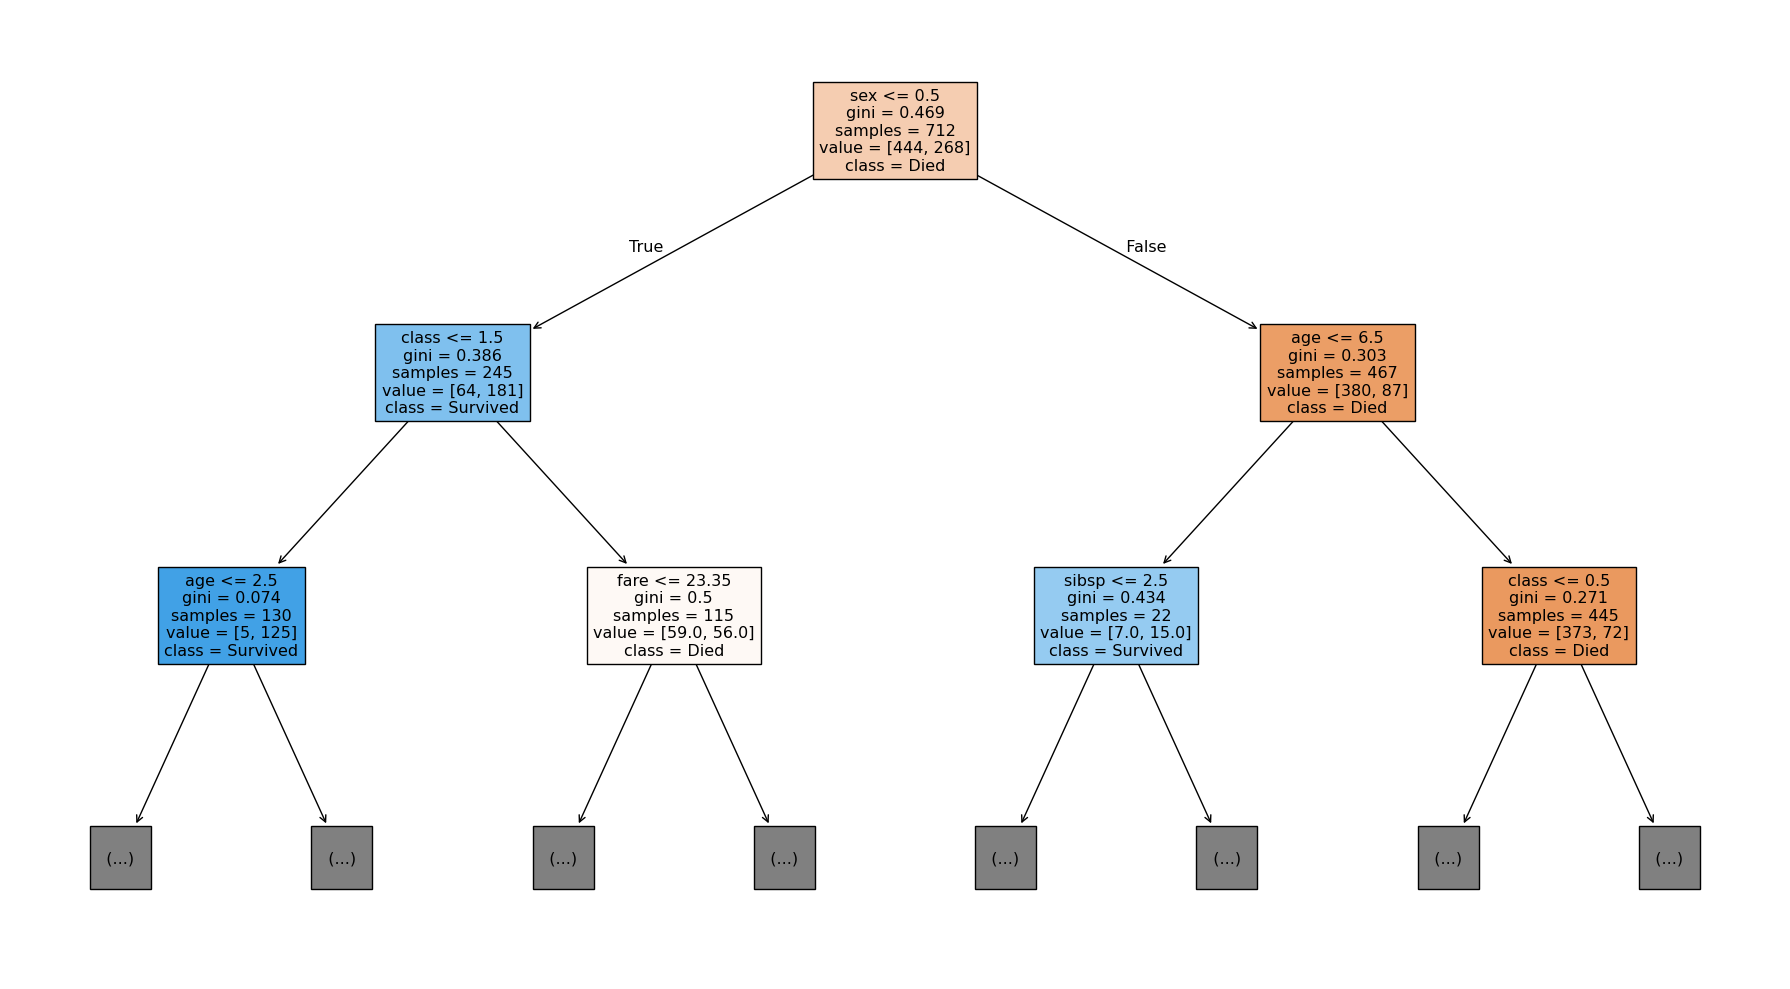

In [9]:
# plot tree
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(
    dt,
    feature_names=X_train.columns,
    class_names = ['Died', 'Survived'],
    max_depth = 2,
    filled = True
)
plt.tight_layout()
plt.show()

# Decision Tree with Pre-Prunning

Decision Tree Depth : 2, Accuracy Score : 0.7653631284916201
Decision Tree Depth : 3, Accuracy Score : 0.7988826815642458
Decision Tree Depth : 4, Accuracy Score : 0.7988826815642458
Decision Tree Depth : 5, Accuracy Score : 0.7988826815642458
Decision Tree Depth : 6, Accuracy Score : 0.7988826815642458


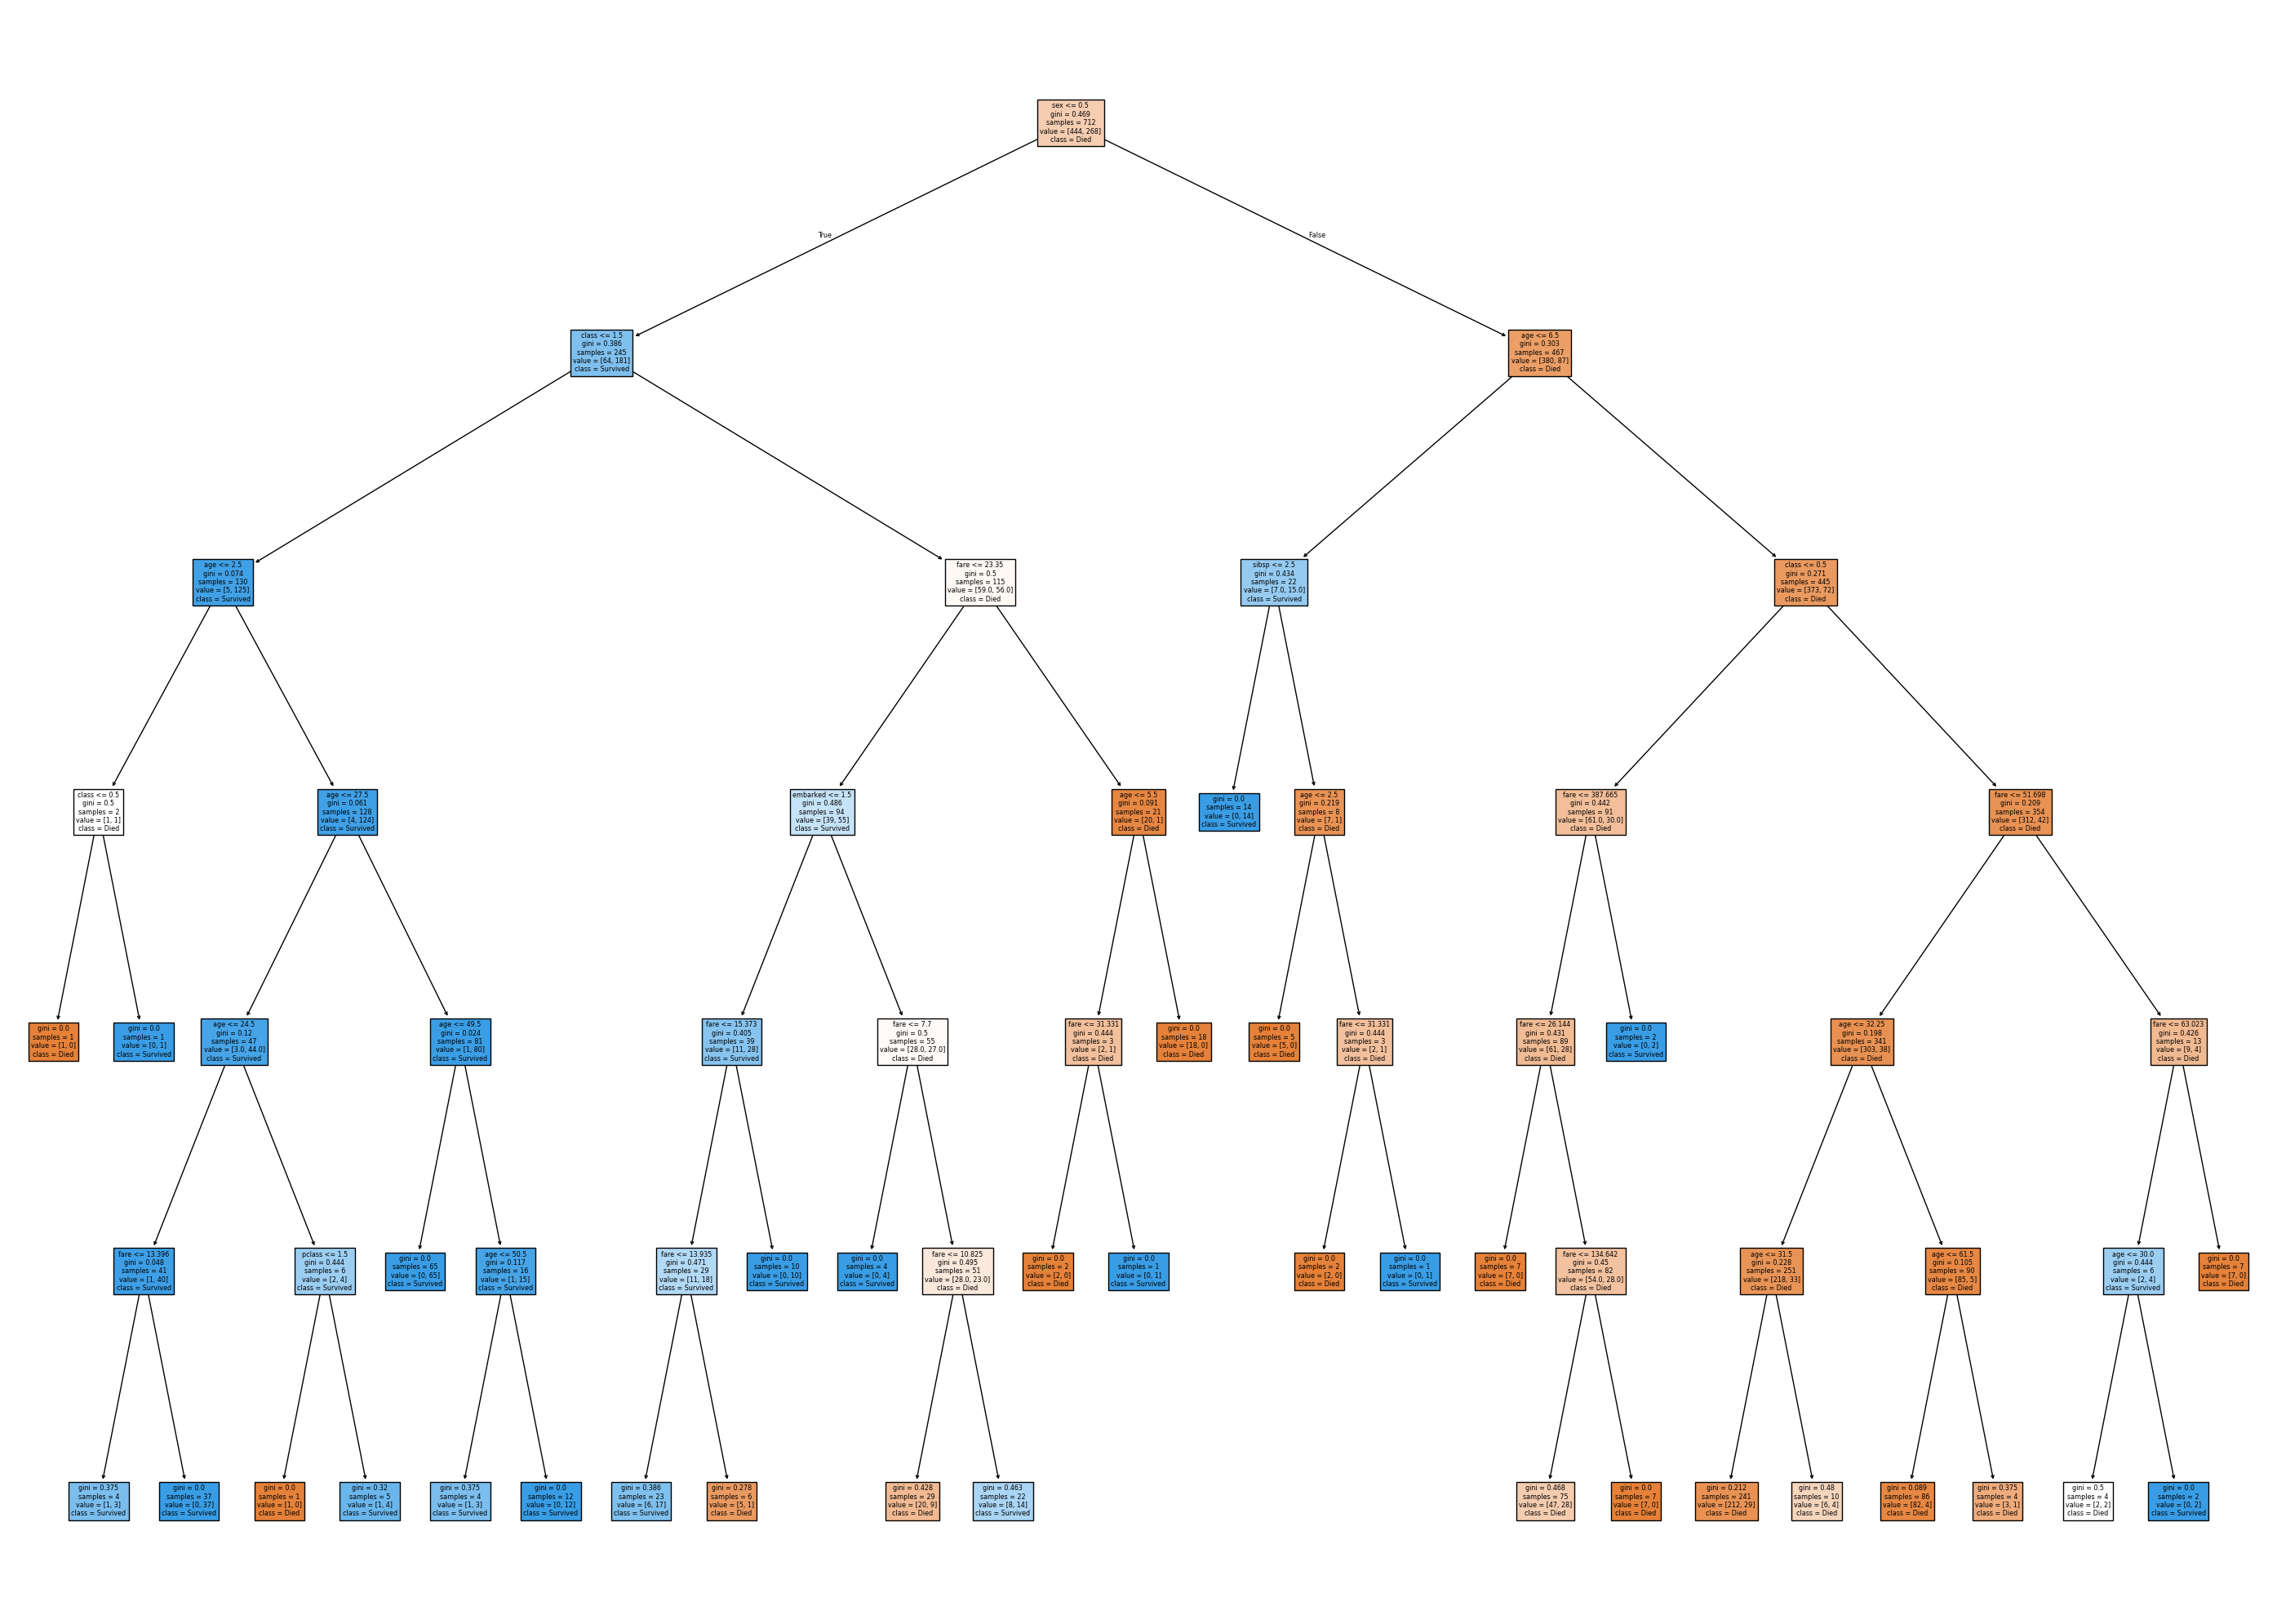

Decision Tree Depth : 7, Accuracy Score : 0.7932960893854749
Decision Tree Depth : 8, Accuracy Score : 0.7877094972067039
Decision Tree Depth : 9, Accuracy Score : 0.7988826815642458
Decision Tree Depth : 10, Accuracy Score : 0.7932960893854749
Decision Tree Depth : 11, Accuracy Score : 0.7877094972067039
Decision Tree Depth : 12, Accuracy Score : 0.7932960893854749
Decision Tree Depth : 13, Accuracy Score : 0.770949720670391


In [10]:
depth = [2,3,4,5,6,7,8,9,10,11,12,13]

for i in depth:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f'Decision Tree Depth : {i}, Accuracy Score : {acc}')

    if i == 6:
        plt.figure(figsize=(28,20))
        plot_tree(
                 model,
                 feature_names=X_train.columns,
                 class_names=['Died', 'Survived'],
                 filled = True)
        plt.tight_layout()
        plt.show()

Model min_sample_split : 5, Accuracy score : 0.8044692737430168
Model min_sample_split : 8, Accuracy score : 0.8100558659217877


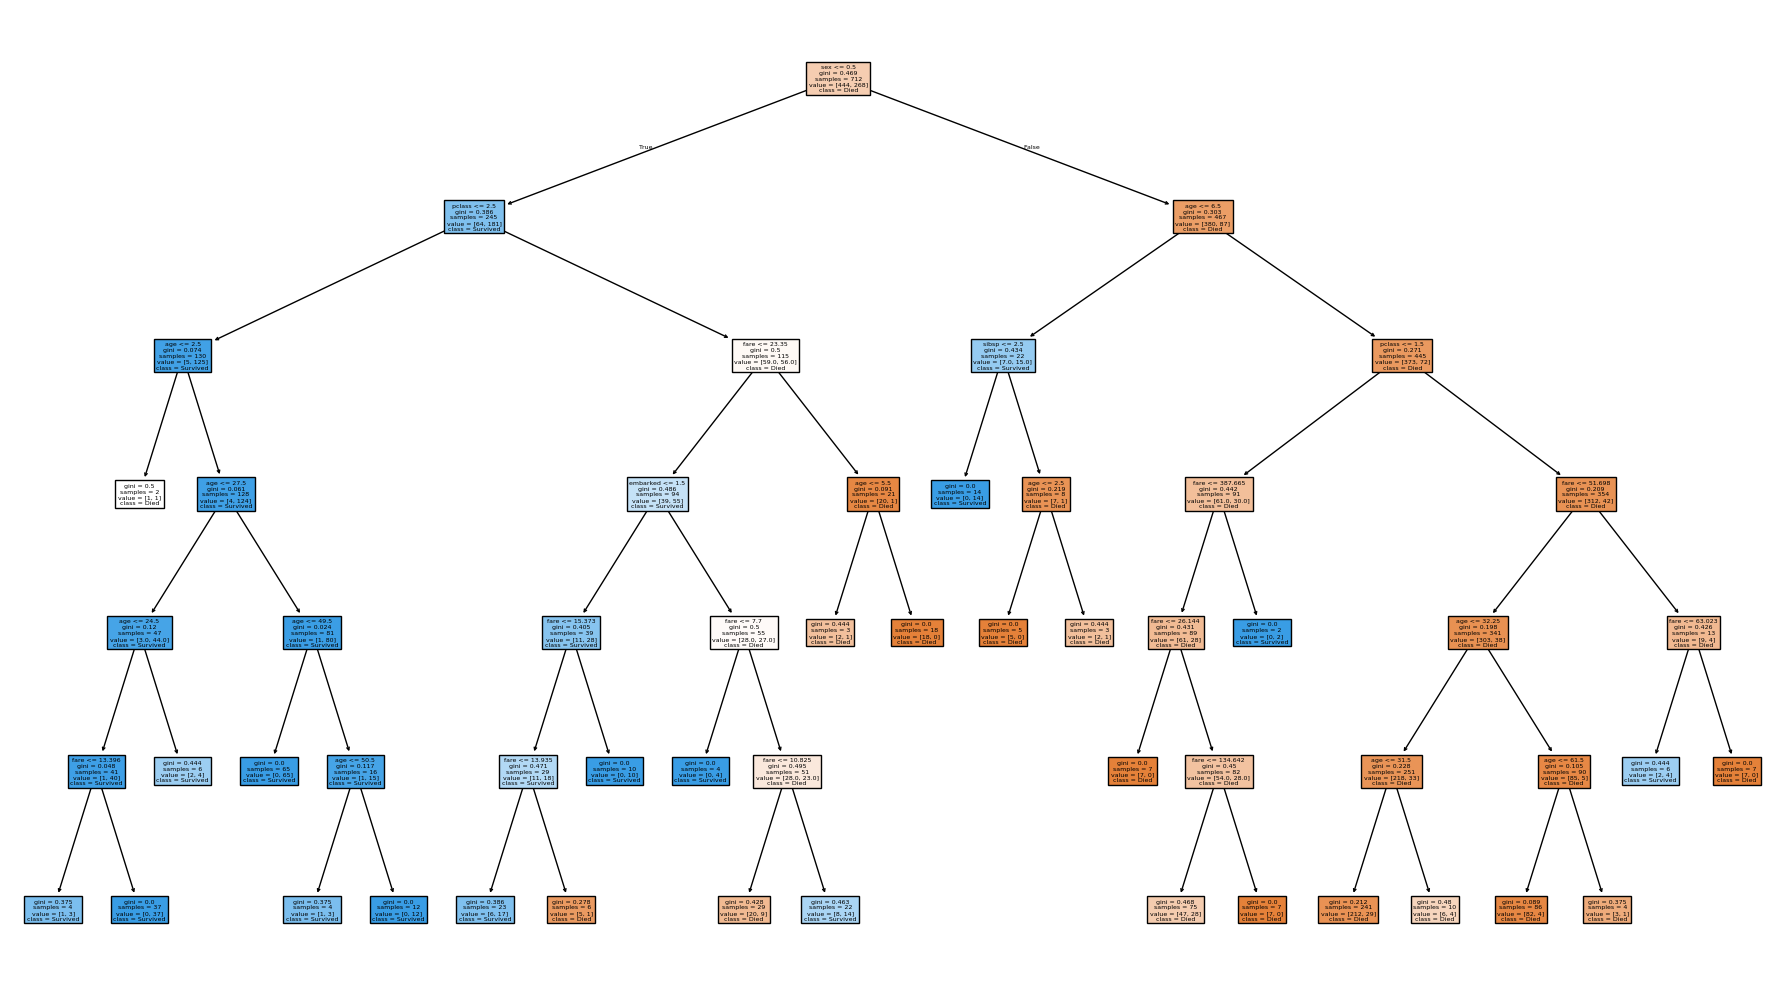

Model min_sample_split : 9, Accuracy score : 0.8100558659217877
Model min_sample_split : 11, Accuracy score : 0.8100558659217877
Model min_sample_split : 15, Accuracy score : 0.8044692737430168
Model min_sample_split : 18, Accuracy score : 0.8044692737430168
Model min_sample_split : 21, Accuracy score : 0.8044692737430168
Model min_sample_split : 24, Accuracy score : 0.7988826815642458


In [11]:
# minimum sample split
samples = [5,8,9,11,15,18,21,24,]

for i in samples:
    model = DecisionTreeClassifier(max_depth=6, min_samples_split=i)
    model.fit(X_train, y_train)

    acc= model.score(X_test, y_test)
    print(f'Model min_sample_split : {i}, Accuracy score : {acc}')

    if i == 8:
        plt.figure(figsize=(18,10))
        plot_tree(model,
                 feature_names = X_train.columns,
                 class_names = ['Died', 'Survived'],
                 filled = True)
        plt.tight_layout()
        plt.show()

# Decision Tree with Post Prunning

In [12]:
full_tree = DecisionTreeClassifier(random_state = 42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 3.90137328e-05 6.68806849e-05
 6.68806849e-05 7.29607471e-05 1.07009096e-04 1.84428555e-04
 2.34082397e-04 2.34082397e-04 3.51123596e-04 4.68164794e-04
 4.68164794e-04 5.61797753e-04 6.24219725e-04 6.67991230e-04
 7.02247191e-04 7.02247191e-04 8.19288390e-04 8.19288390e-04
 8.32292967e-04 8.42696629e-04 8.42696629e-04 8.94231048e-04
 9.15522264e-04 9.24769963e-04 9.36329588e-04 9.36329588e-04
 9.88347898e-04 1.05337079e-03 1.05337079e-03 1.07400895e-03
 1.12359551e-03 1.12359551e-03 1.12359551e-03 1.13089158e-03
 1.13529963e-03 1.16003094e-03 1.18841832e-03 1.20385233e-03
 1.20422389e-03 1.22566125e-03 1.24361593e-03 1.27565833e-03
 1.30996111e-03 1.33761370e-03 1.34831461e-03 1.42678794e-03
 1.45851340e-03 1.47927070e-03 1.54072312e-03 1.58404145e-03
 1.68074069e-03 1.68539326e-03 1.74143466e-03 1.86751451e-03
 1.89599093e-03 1.89606742e-03 2.10674157e-03 2.34082397e-03
 2.41226470e-03 2.64273538e-03 2.69412911e-03 3.43770913e-03
 3.56327570e-03 9.055400

In [14]:
# train our model for all alphas

trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)

    trees.append((model, alpha))

In [15]:
best_acc = 0
best_alpha = 0

for model, alpha in trees:
    curr_acc = model.score(X_test, y_test)
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha

In [16]:
best_acc

0.8324022346368715

In [17]:
best_model = DecisionTreeClassifier(ccp_alpha=best_alpha, max_depth=11)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0015407231242023183, max_depth=11)

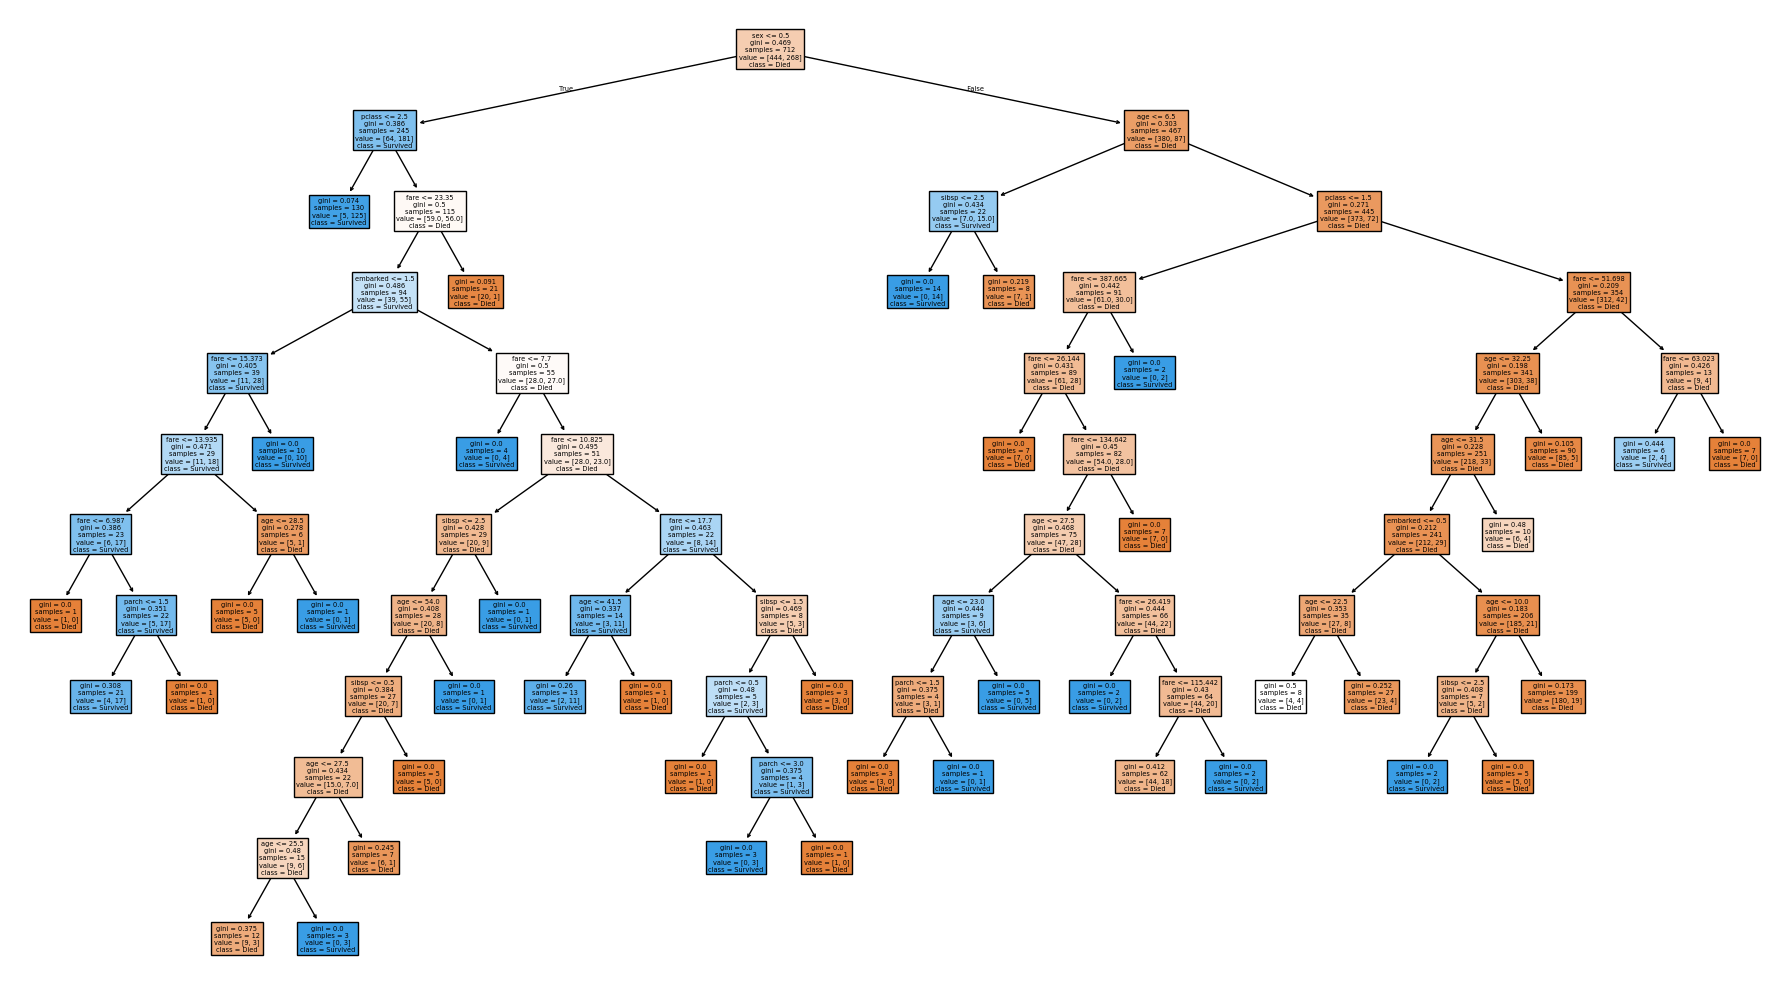

In [18]:
plt.figure(figsize=(18, 10))
plot_tree(
    best_model,
    feature_names=X_train.columns,
    class_names=["Died", "Survived"],
    filled=True
)
        
plt.tight_layout()
plt.show()

In [19]:
print(best_model.score(X_test, y_test))

0.8324022346368715
